# About
## Dataset
Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe someone can find a trend or give a prediction? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should I buy a 2 bedroom unit?
Content & Acknowledgements

This data was scraped from publicly available results posted every week from Domain.com.au

....Now with extra data including including property size, land size and council area, you may need to change your code!
Some Key Details


## Attributes

Suburb: Suburb

Address: Address
    
Rooms: Number of rooms
    
Price: Price in Australian dollars

Method: 
    
        S - property sold; 
        SP - property sold prior; 
        PI - property passed in; 
        PN - sold prior not disclosed; 
        SN - sold not disclosed; 
        NB - no bid; 
        VB - vendor bid; 
        W - withdrawn prior to auction; S
        A - sold after auction; 
        SS - sold after auction price not disclosed. 
        N/A - price or highest bid not available.

Type: 

    br - bedroom(s); 
    h - house,cottage,villa, semi,terrace; 
    u - unit, duplex; 
    t - townhouse; dev site - development site; 
    o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
def fig(x = 8, y = 6):
    plt.figure(figsize=(x, y))

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, explained_variance_score

import warnings as wrn
wrn.filterwarnings('ignore')

In [23]:
df_orig = pd.read_csv("Melbourne_housing_FULL.csv")
df = df_orig

In [24]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [25]:
len(df.Address.unique()) 

34009

In [26]:
len(df.SellerG.unique())

388

In [27]:
len(df.Suburb.unique())

351

In [28]:
len(df.Postcode.unique())

212

In [29]:
len(df.CouncilArea.unique())

34

In [30]:
len(df.Regionname.unique())

9

In [31]:
len(df.Propertycount.unique())

343

In [32]:
df = df[['Suburb','Rooms','Type','Method','SellerG','Date','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount', 'Price'] ]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 20 columns):
Suburb           34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
Price            27247 non-null float64
dtypes: float64(12), int64(1), object(7)
memory usage: 5.3+ MB


In [34]:
df = df.dropna(subset=['Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 20 columns):
Suburb           27247 non-null object
Rooms            27247 non-null int64
Type             27247 non-null object
Method           27247 non-null object
SellerG          27247 non-null object
Date             27247 non-null object
Distance         27246 non-null float64
Postcode         27246 non-null float64
Bedroom2         20806 non-null float64
Bathroom         20800 non-null float64
Car              20423 non-null float64
Landsize         17982 non-null float64
BuildingArea     10656 non-null float64
YearBuilt        12084 non-null float64
CouncilArea      27244 non-null object
Lattitude        20993 non-null float64
Longtitude       20993 non-null float64
Regionname       27244 non-null object
Propertycount    27244 non-null float64
Price            27247 non-null float64
dtypes: float64(12), int64(1), object(7)
memory usage: 4.4+ MB


In [35]:
#Because of some NaN values labelEncoder cannot be directly applied hence we first manually 
#fill the nan object columns with mode i.e Highest frequescy value of their respective columns and
#apply labelEncoding
from statistics import mode
df['CouncilArea'] = df['CouncilArea'].fillna(value = mode(df.CouncilArea))
df['Regionname']  = df['Regionname'].fillna(value = mode(df.Regionname))

In [36]:
df.head()

,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
1,Abbotsford,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1480000.0
2,Abbotsford,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1035000.0
4,Abbotsford,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1465000.0
5,Abbotsford,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,850000.0
6,Abbotsford,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1600000.0


In [37]:
df = df.apply(LabelEncoder().fit_transform)

In [38]:
X = df.drop('Price', 1)
y = df['Price']

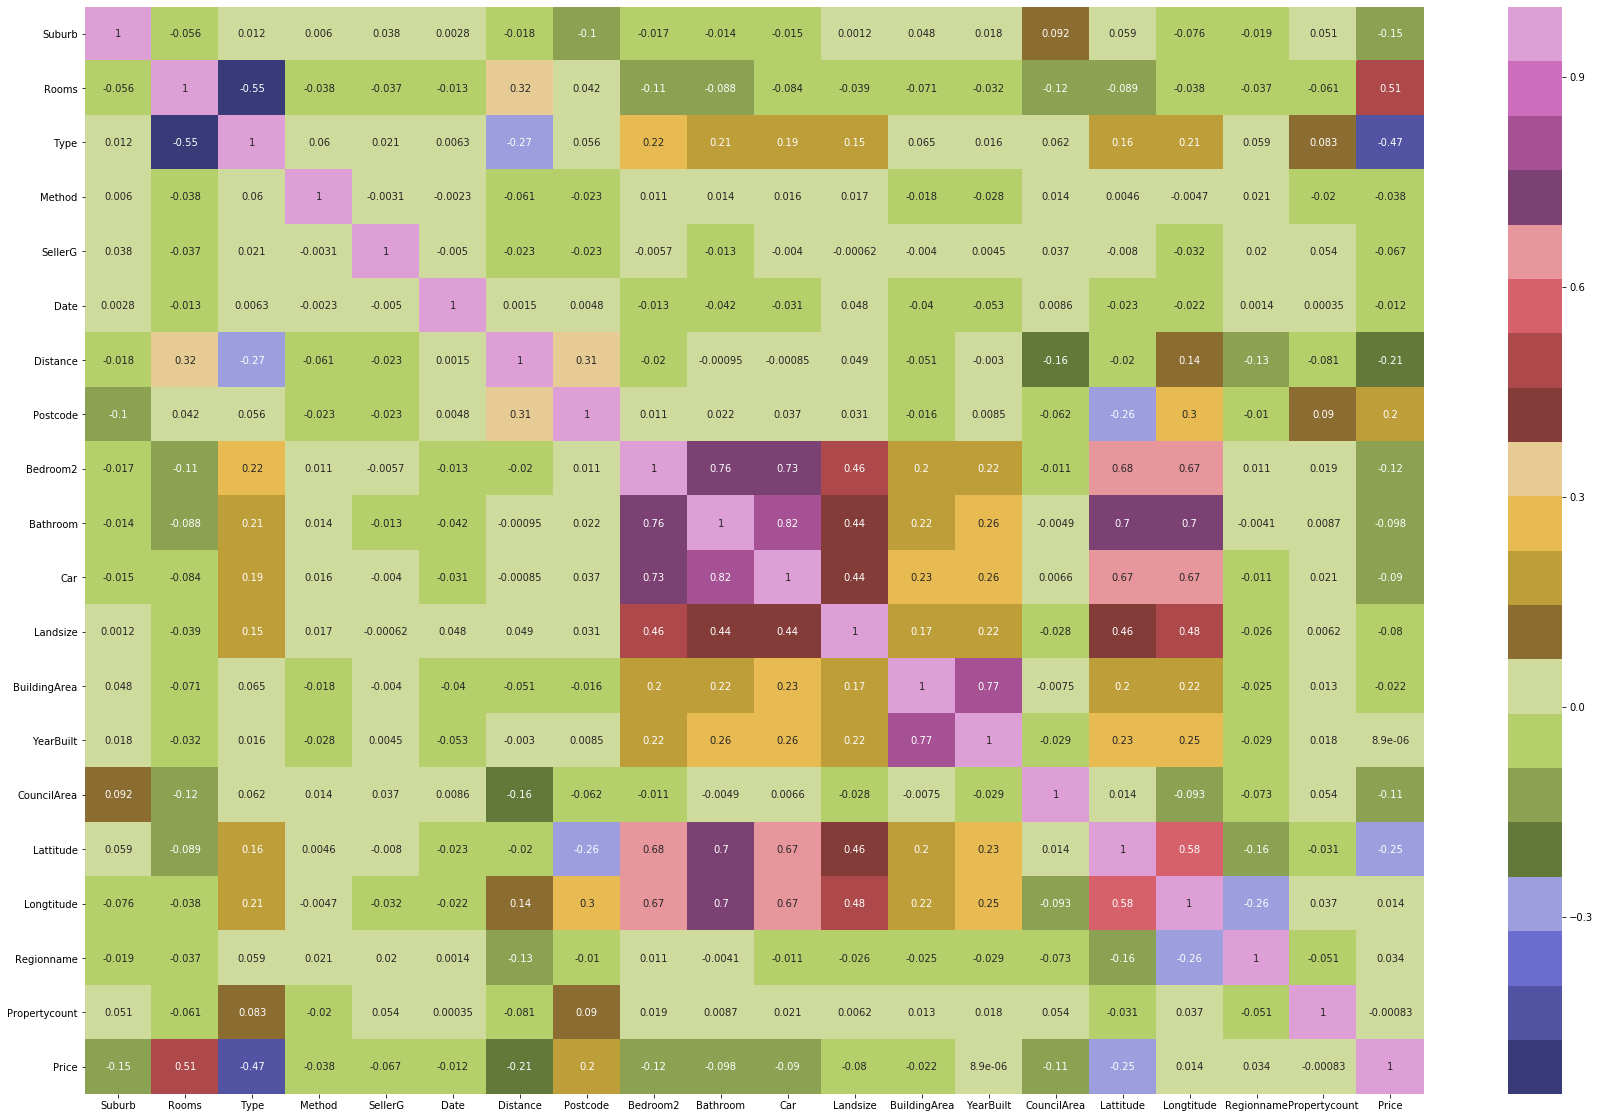

In [39]:
fig(30, 20)
sns.heatmap(df.corr(), annot = True, cmap = 'tab20b')

In [40]:
si = SimpleImputer()
df = si.fit_transform(X)  

In [41]:
train_x, test_x, train_y, test_y = train_test_split(X, y)

In [42]:
clf =  RandomForestClassifier()
clf.fit(train_x, train_y)
print(accuracy_score(clf.predict(test_x), test_y)*100)

0.9835584263065179
